<a href="https://colab.research.google.com/github/didulanthaisuru/time_series_forecasting/blob/main/colab_n_beats_for_cluster_threeipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive

In [7]:
import os

# List files in the sample_data folder
sample_data_path = '/content/drive/MyDrive/Colab Notebooks'
files = os.listdir(sample_data_path)
print(files)

['lstm.ipynb', 'n_beats.ipynb', 'n_beats_for_cluster threeipynb.ipynb', '.ipynb_checkpoints', 'cluster3_payments_only.csv']


In [8]:
file_path = '/content/drive/MyDrive/Colab Notebooks/cluster3_payments_only.csv'

In [9]:
!pip uninstall -y sklearn scikit-learn
!pip install scikit-learn==1.2.2
!pip install darts==0.23.1

!pip install torch pandas numpy matplotlib scikit-learn==1.2.2
import pandas as pd

Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Successfully uninstalled scikit-learn-1.2.2
  Using cached scikit_learn-1.2.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
Using cached scikit_learn-1.2.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.6 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.2.2 which is incompatible.
mlxtend 0.23.4 requires scikit-learn>=1.3.1, but you have scikit-learn 1.2.2 which is incompatible.


In [10]:
df=pd.read_csv(file_path)

In [11]:
df.head()

,Date,Payments
0,2022-12-27,30.0
1,2022-12-27,50.0
2,2023-01-19,30.0
3,2023-01-30,2450.0
4,2023-02-13,15000.0


In [12]:
DataFrame=df

In [13]:
DataFrame.head()

,Date,Payments
0,2022-12-27,30.0
1,2022-12-27,50.0
2,2023-01-19,30.0
3,2023-01-30,2450.0
4,2023-02-13,15000.0


In [14]:
import pandas as pd

# Assuming df is already loaded with df = pd.read_csv(file_path)

# Step 1: Ensure 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Step 2: Generate a complete sequence of dates from the earliest to the latest
all_dates = pd.date_range(start=df['Date'].min(), end=df['Date'].max(), freq='D')

# Step 3: Sum payments for each date (handles multiple entries per day)
daily_totals = df.groupby('Date')['Payments'].sum()

# Step 4: Reindex to include all dates, filling missing days with 0.0
time_series = daily_totals.reindex(all_dates, fill_value=0.0)

# Step 5 (Optional): Convert to a DataFrame with 'Date' and 'Payments' columns
time_series_df = pd.DataFrame({'Date': time_series.index, 'Payments': time_series.values})

In [15]:
print(time_series_df.to_string(max_rows=None, index=False, float_format="{:.2f}".format))

      Date   Payments
2022-12-27      80.00
2022-12-28       0.00
2022-12-29       0.00
2022-12-30       0.00
2022-12-31       0.00
2023-01-01       0.00
2023-01-02       0.00
2023-01-03       0.00
2023-01-04       0.00
2023-01-05       0.00
2023-01-06       0.00
2023-01-07       0.00
2023-01-08       0.00
2023-01-09       0.00
2023-01-10       0.00
2023-01-11       0.00
2023-01-12       0.00
2023-01-13       0.00
2023-01-14       0.00
2023-01-15       0.00
2023-01-16       0.00
2023-01-17       0.00
2023-01-18       0.00
2023-01-19      30.00
2023-01-20       0.00
2023-01-21       0.00
2023-01-22       0.00
2023-01-23       0.00
2023-01-24       0.00
2023-01-25       0.00
2023-01-26       0.00
2023-01-27       0.00
2023-01-28       0.00
2023-01-29       0.00
2023-01-30    2450.00
2023-01-31       0.00
2023-02-01       0.00
2023-02-02       0.00
2023-02-03       0.00
2023-02-04       0.00
2023-02-05       0.00
2023-02-06       0.00
2023-02-07       0.00
2023-02-08       0.00
2023-02-09

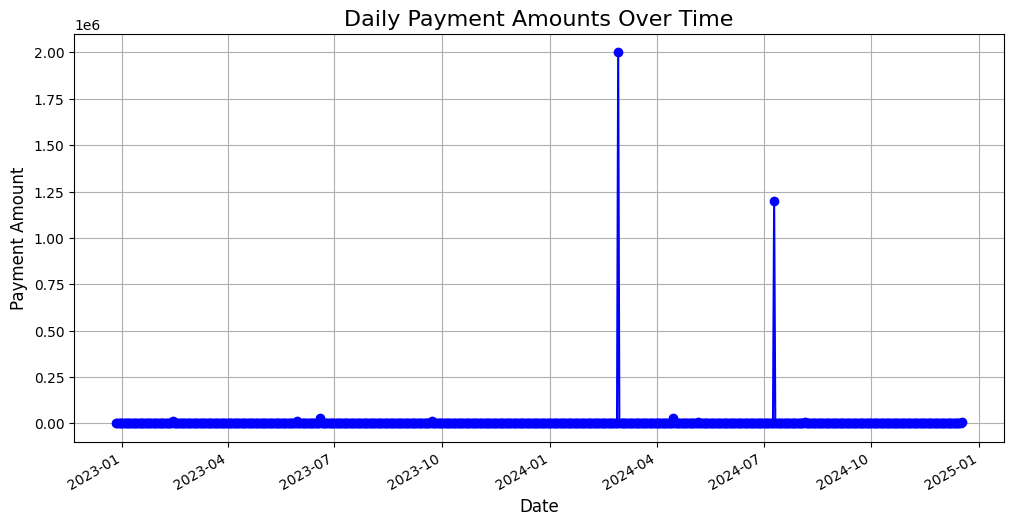

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming time_series_df is your DataFrame with 'Date' and 'Payments' columns

# Ensure 'Date' column is in datetime format
assert pd.api.types.is_datetime64_any_dtype(time_series_df['Date']), "Date column must be in datetime format"

# Create the plot
plt.figure(figsize=(12, 6))  # Set figure size for better visibility
plt.plot(time_series_df['Date'], time_series_df['Payments'], marker='o', linestyle='-', color='b')

# Customize the plot
plt.title('Daily Payment Amounts Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Payment Amount', fontsize=12)
plt.grid(True)  # Add a grid for easier reading

# Rotate and format date labels for readability
plt.gcf().autofmt_xdate()

# Display the plot
plt.show()

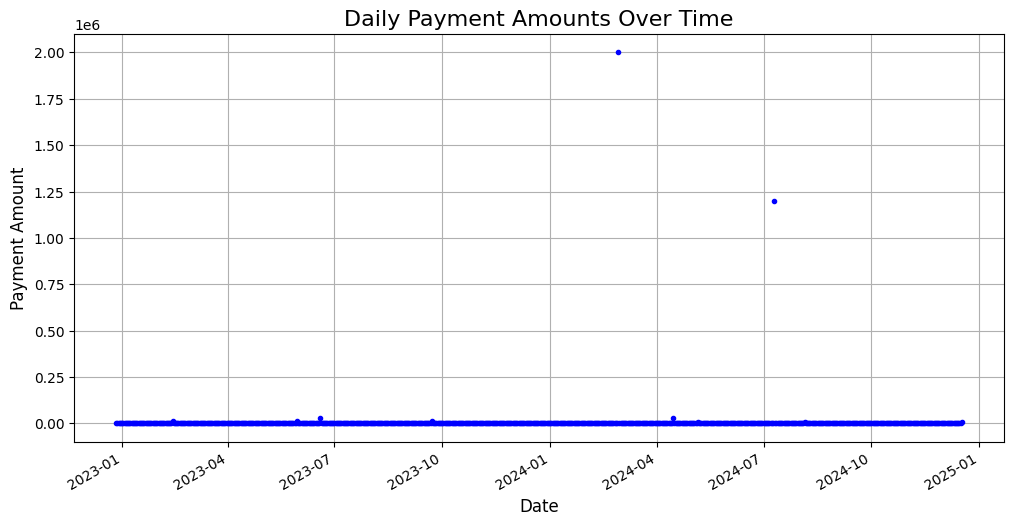

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming time_series_df is your DataFrame with 'Date' and 'Payments' columns
# Ensure 'Date' column is in datetime format
assert pd.api.types.is_datetime64_any_dtype(time_series_df['Date']), "Date column must be in datetime format"

# Create the plot
plt.figure(figsize=(12, 6))  # Set figure size for better visibility
plt.plot(time_series_df['Date'], time_series_df['Payments'], marker='o', linestyle='', color='b', markersize=3)

# Customize the plot
plt.title('Daily Payment Amounts Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Payment Amount', fontsize=12)
plt.grid(True)  # Add a grid for easier reading

# Rotate and format date labels for readability
plt.gcf().autofmt_xdate()

# Display the plot
plt.show()

In [18]:
!pip install darts

In [34]:
!pip install darts pytorch-lightning

In [36]:
!pip install --upgrade pip
!pip install numpy==1.24.3
!pip install pandas matplotlib
!pip install torch
!pip install darts==0.23.1 pytorch-lightning==1.9.5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 69.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 2.0.5 requires numpy>=1.24.4, but you have numpy 1.24.3 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.3 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.3 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.3 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.3 which is incompatible.
albucore 0.0.23 requires numpy>=1.24.4, but you have numpy 1.24.3 which is incompatible.
blosc2 3.2.0 requires numpy>=1.26, but you have numpy 1.24.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 592.0/592.0 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 829.5/829.5 kB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 50.0 MB/s eta 0:00:00
^C


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import datetime
import time
import warnings
warnings.filterwarnings('ignore')

# Check device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Custom Dataset for time series
class TimeSeriesDataset(Dataset):
    def __init__(self, data, input_window, output_window, stride=1):
        self.data = data
        self.input_window = input_window
        self.output_window = output_window
        self.stride = stride
        self.samples = self._create_samples()

    def _create_samples(self):
        samples = []
        for i in range(0, len(self.data) - self.input_window - self.output_window + 1, self.stride):
            x = self.data[i:i+self.input_window]
            y = self.data[i+self.input_window:i+self.input_window+self.output_window]
            samples.append((x, y))
        return samples

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        x, y = self.samples[idx]
        return torch.FloatTensor(x), torch.FloatTensor(y)

# N-BEATS Block
class NBeatsBlock(nn.Module):
    def __init__(self, input_size, theta_size, hidden_size, layers):
        super().__init__()

        self.input_size = input_size
        self.theta_size = theta_size
        self.hidden_size = hidden_size
        self.layers = layers

        # Fully connected stack
        fc_layers = []
        fc_layers.append(nn.Linear(input_size, hidden_size))
        fc_layers.append(nn.ReLU())

        for _ in range(layers - 1):
            fc_layers.append(nn.Linear(hidden_size, hidden_size))
            fc_layers.append(nn.ReLU())

        self.fc_layers = nn.Sequential(*fc_layers)

        # Output theta layer
        self.theta_layer = nn.Linear(hidden_size, theta_size)

        # Backcast and forecast projection layers
        self.backcast_layer = nn.Linear(theta_size, input_size)
        self.forecast_layer = nn.Linear(theta_size, input_size)

    def forward(self, x):
        # Forward pass through fully connected layers
        x = self.fc_layers(x)

        # Get the theta values
        theta = self.theta_layer(x)

        # Get backcast and forecast
        backcast = self.backcast_layer(theta)
        forecast = self.forecast_layer(theta)

        return backcast, forecast

# N-BEATS Model
class NBeatsModel(nn.Module):
    def __init__(self, input_size, output_size, hidden_size=128, layers=4, blocks=3):
        super().__init__()

        self.input_size = input_size
        self.output_size = output_size

        # Create N-BEATS blocks
        self.blocks = nn.ModuleList([
            NBeatsBlock(
                input_size=input_size,
                theta_size=hidden_size,
                hidden_size=hidden_size,
                layers=layers
            ) for _ in range(blocks)
        ])

        # Output adapter (in case output_size != input_size)
        self.output_adapter = nn.Linear(input_size, output_size)

    def forward(self, x):
        # Store backcast and initialize forecast
        backcast = x
        forecast = torch.zeros_like(backcast)

        # Apply blocks sequentially
        for block in self.blocks:
            # Get block backcast and block forecast
            b, f = block(backcast)

            # Update backcast and forecast
            backcast = backcast - b
            forecast = forecast + f

        # Adapt forecast if needed
        if self.input_size != self.output_size:
            forecast = self.output_adapter(forecast)

        return forecast

# Training and evaluation functions
def train_model(model, train_loader, val_loader, epochs=50, lr=1e-3, patience=10):
    """Train the N-BEATS model with early stopping"""
    model.to(device)
    optimizer = optim.Adam(model.parameters(), lr=lr)
    criterion = nn.MSELoss()

    best_val_loss = float('inf')
    early_stop_counter = 0
    history = {'train_loss': [], 'val_loss': []}

    for epoch in range(epochs):
        # Training
        model.train()
        train_loss = 0.0

        for x_batch, y_batch in train_loader:
            x_batch, y_batch = x_batch.to(device), y_batch.to(device)

            # Zero the gradients
            optimizer.zero_grad()

            # Forward pass
            y_pred = model(x_batch)

            # Calculate loss
            loss = criterion(y_pred, y_batch)

            # Backward pass
            loss.backward()

            # Update parameters
            optimizer.step()

            train_loss += loss.item()

        train_loss /= len(train_loader)
        history['train_loss'].append(train_loss)

        # Validation
        model.eval()
        val_loss = 0.0

        with torch.no_grad():
            for x_batch, y_batch in val_loader:
                x_batch, y_batch = x_batch.to(device), y_batch.to(device)

                # Forward pass
                y_pred = model(x_batch)

                # Calculate loss
                loss = criterion(y_pred, y_batch)
                val_loss += loss.item()

        val_loss /= len(val_loader)
        history['val_loss'].append(val_loss)

        print(f'Epoch {epoch+1}/{epochs} - Train Loss: {train_loss:.4f} - Val Loss: {val_loss:.4f}')

        # Early stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            early_stop_counter = 0
            # Save the best model
            torch.save(model.state_dict(), 'nbeats_best_model.pt')
        else:
            early_stop_counter += 1

        if early_stop_counter >= patience:
            print(f'Early stopping at epoch {epoch+1}')
            break

    # Load the best model
    model.load_state_dict(torch.load('nbeats_best_model.pt'))

    return model, history

def predict(model, x):
    """Make predictions with the model"""
    model.eval()
    with torch.no_grad():
        x_tensor = torch.FloatTensor(x).unsqueeze(0).to(device)
        prediction = model(x_tensor)
        return prediction.cpu().numpy().squeeze()

def rolling_forecast(model, data, input_window, output_window, steps=1):
    """Perform rolling forecast on data"""
    results = []
    forecast_dates = []

    # Initial input window
    input_data = data[-input_window:].copy()

    for _ in range(0, output_window, steps):
        # Get forecast for next step(s)
        forecast = predict(model, input_data)

        # Only keep the first 'steps' values
        forecast = forecast[:steps]

        # Store forecast
        results.extend(forecast)

        # Update input window
        input_data = np.append(input_data[steps:], forecast)

    return np.array(results)

def evaluate_model(y_true, y_pred):
    """Calculate evaluation metrics"""
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    return {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'MAPE': mape
    }

Using device: cpu


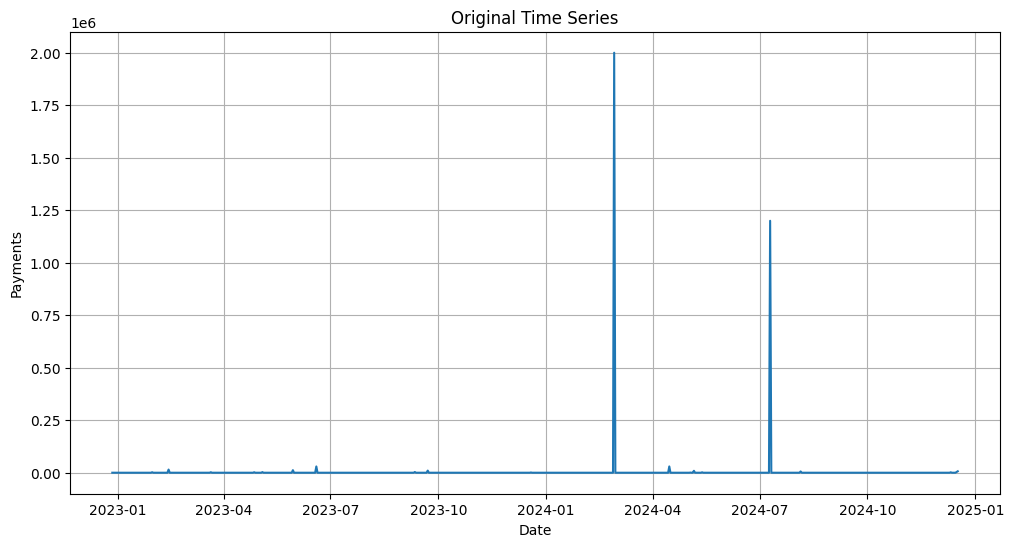

Epoch 1/30 - Train Loss: 0.0034 - Val Loss: 0.0041
Epoch 2/30 - Train Loss: 0.0027 - Val Loss: 0.0041
Epoch 3/30 - Train Loss: 0.0023 - Val Loss: 0.0040
Epoch 4/30 - Train Loss: 0.0022 - Val Loss: 0.0040
Epoch 5/30 - Train Loss: 0.0022 - Val Loss: 0.0040
Epoch 6/30 - Train Loss: 0.0022 - Val Loss: 0.0040
Epoch 7/30 - Train Loss: 0.0022 - Val Loss: 0.0040
Epoch 8/30 - Train Loss: 0.0022 - Val Loss: 0.0040
Epoch 9/30 - Train Loss: 0.0025 - Val Loss: 0.0040
Epoch 10/30 - Train Loss: 0.0024 - Val Loss: 0.0040
Epoch 11/30 - Train Loss: 0.0023 - Val Loss: 0.0040
Epoch 12/30 - Train Loss: 0.0022 - Val Loss: 0.0040
Epoch 13/30 - Train Loss: 0.0025 - Val Loss: 0.0040
Epoch 14/30 - Train Loss: 0.0022 - Val Loss: 0.0040
Epoch 15/30 - Train Loss: 0.0022 - Val Loss: 0.0040
Early stopping at epoch 15


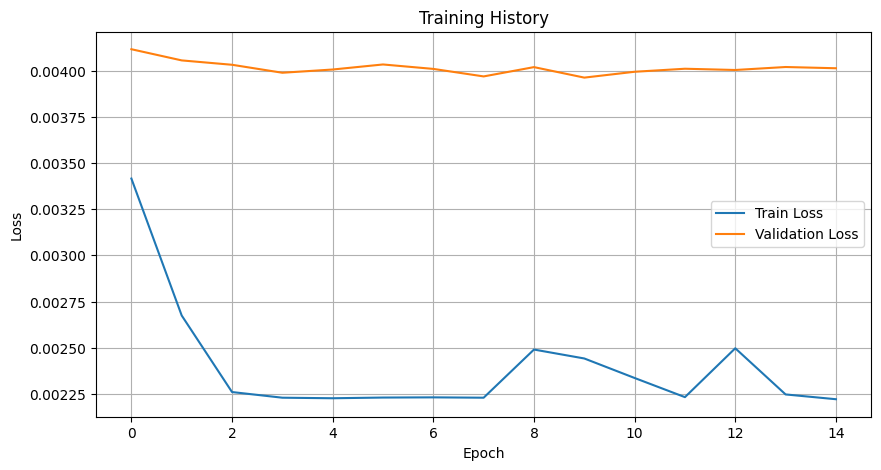

MSE: 297378244.0656
RMSE: 17244.6584
MAE: 13337.0152
MAPE: inf


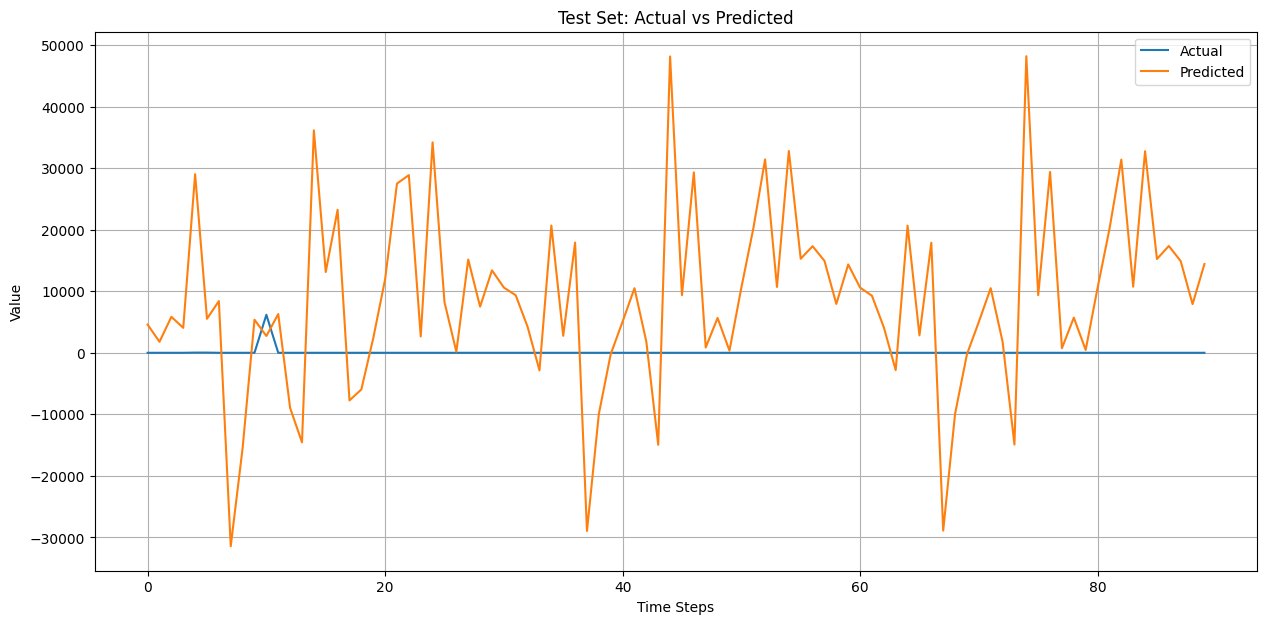

30-Day Forecast:
        Date      Forecast
0 2024-12-18  10415.812500
1 2024-12-19  10317.283203
2 2024-12-20  10330.000977
3 2024-12-21  10332.311523
4 2024-12-22  10292.705078
5 2024-12-23  10206.584961
6 2024-12-24  10180.691406
7 2024-12-25  10095.603516
8 2024-12-26  10073.755859
9 2024-12-27  10026.146484


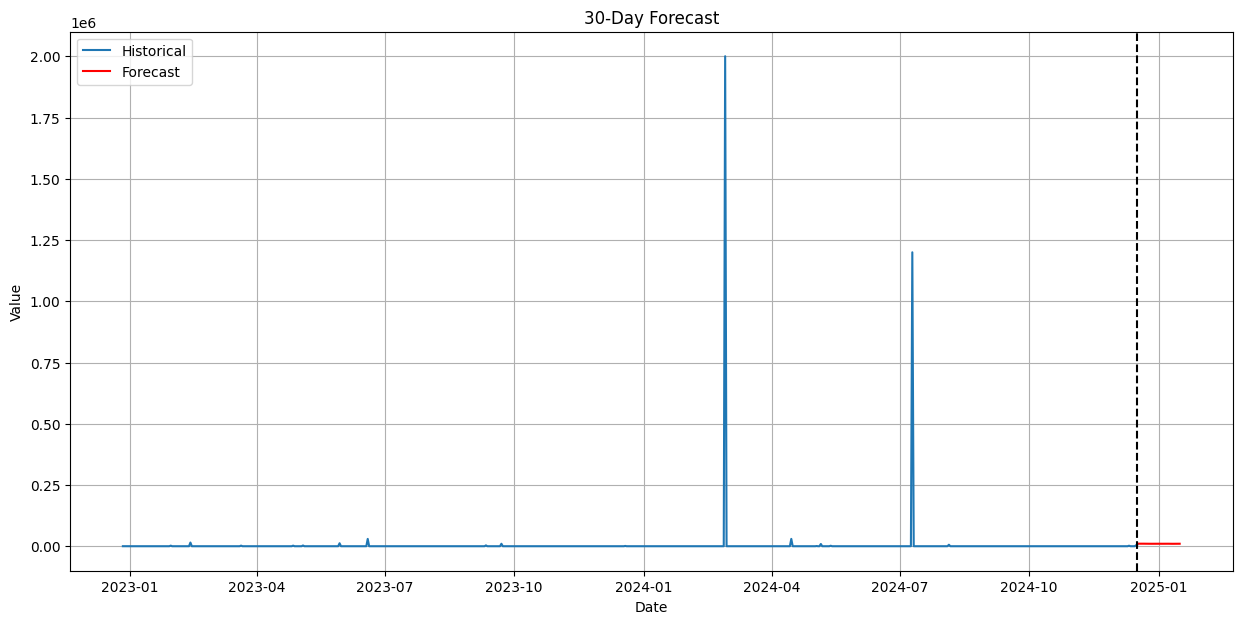

Model saved as 'nbeats_model_complete.pt'


In [20]:
# Assuming time_series_df is your DataFrame with 'Date' and 'Payments' columns
# If you need to create a sample dataframe, uncomment the following:
# dates = pd.date_range(start='2020-01-01', periods=365, freq='D')
# time_series_df = pd.DataFrame({
#     'Date': dates,
#     'Payments': np.sin(np.linspace(0, 20, 365)) * 100 + np.random.normal(0, 10, 365) + 500
# })

# Make sure Date is datetime
time_series_df['Date'] = pd.to_datetime(time_series_df['Date'])

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(time_series_df['Date'], time_series_df['Payments'])
plt.title('Original Time Series')
plt.xlabel('Date')
plt.ylabel('Payments')
plt.grid(True)
plt.show()

# Scale the data
scaler = MinMaxScaler()
data = scaler.fit_transform(time_series_df[['Payments']])
data = data.flatten()

# Split into train and test sets (e.g., 80% train, 20% test)
split_idx = int(len(data) * 0.8)
train_data = data[:split_idx]
test_data = data[split_idx:]

# Parameters
input_window = 30
output_window = 30
batch_size = 32

# Create datasets and dataloaders
train_dataset = TimeSeriesDataset(train_data, input_window, output_window, stride=1)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

val_dataset = TimeSeriesDataset(train_data[-int(len(train_data)*0.2):], input_window, output_window, stride=1)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Create and train the model
model = NBeatsModel(
    input_size=input_window,
    output_size=output_window,
    hidden_size=128,
    layers=2,
    blocks=2
)

# Train the model
model, history = train_model(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    epochs=30,
    lr=1e-3,
    patience=5
)

# Plot training history
plt.figure(figsize=(10, 5))
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Training History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate on test set
test_predictions = []
test_actuals = []

for i in range(0, len(test_data) - input_window - output_window + 1, output_window):
    # Get input window
    x = data[split_idx + i - input_window:split_idx + i]

    # Get actual values
    actual = test_data[i:i+output_window]

    # Make prediction
    pred = predict(model, x)

    test_predictions.append(pred)
    test_actuals.append(actual)

# Concatenate predictions and actuals
all_preds = np.concatenate(test_predictions)
all_actuals = np.concatenate(test_actuals)

# Truncate to the shortest length
min_len = min(len(all_preds), len(all_actuals))
all_preds = all_preds[:min_len]
all_actuals = all_actuals[:min_len]

# Inverse transform
all_preds_orig = scaler.inverse_transform(all_preds.reshape(-1, 1)).flatten()
all_actuals_orig = scaler.inverse_transform(all_actuals.reshape(-1, 1)).flatten()

# Evaluate
metrics = evaluate_model(all_actuals_orig, all_preds_orig)
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")

# Plot predictions vs actuals
plt.figure(figsize=(15, 7))
plt.plot(all_actuals_orig, label='Actual')
plt.plot(all_preds_orig, label='Predicted')
plt.title('Test Set: Actual vs Predicted')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# 30-day rolling forecast
# Get last input window
last_window = data[-input_window:]

# Generate 30-day forecast
forecast = rolling_forecast(model, data, input_window, output_window)

# Inverse transform the forecast
forecast_orig = scaler.inverse_transform(forecast.reshape(-1, 1)).flatten()

# Create dates for the forecast
last_date = time_series_df['Date'].iloc[-1]
forecast_dates = [last_date + datetime.timedelta(days=i+1) for i in range(len(forecast))]

# Create forecast DataFrame
forecast_df = pd.DataFrame({
    'Date': forecast_dates,
    'Forecast': forecast_orig
})

print("30-Day Forecast:")
print(forecast_df.head(10))  # Show first 10 days

# Plot historical data and forecast
plt.figure(figsize=(15, 7))
plt.plot(time_series_df['Date'], time_series_df['Payments'], label='Historical')
plt.plot(forecast_df['Date'], forecast_df['Forecast'], 'r-', label='Forecast')
plt.axvline(x=last_date, color='k', linestyle='--')
plt.title('30-Day Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# Save the model
torch.save({
    'model_state_dict': model.state_dict(),
    'input_window': input_window,
    'output_window': output_window,
    'scaler': scaler
}, 'nbeats_model_complete.pt')

print("Model saved as 'nbeats_model_complete.pt'")


Rolling Evaluation Metrics:
MSE: 8191589466.8938
RMSE: 90507.4001
MAE: 17327.7821
MAPE: inf


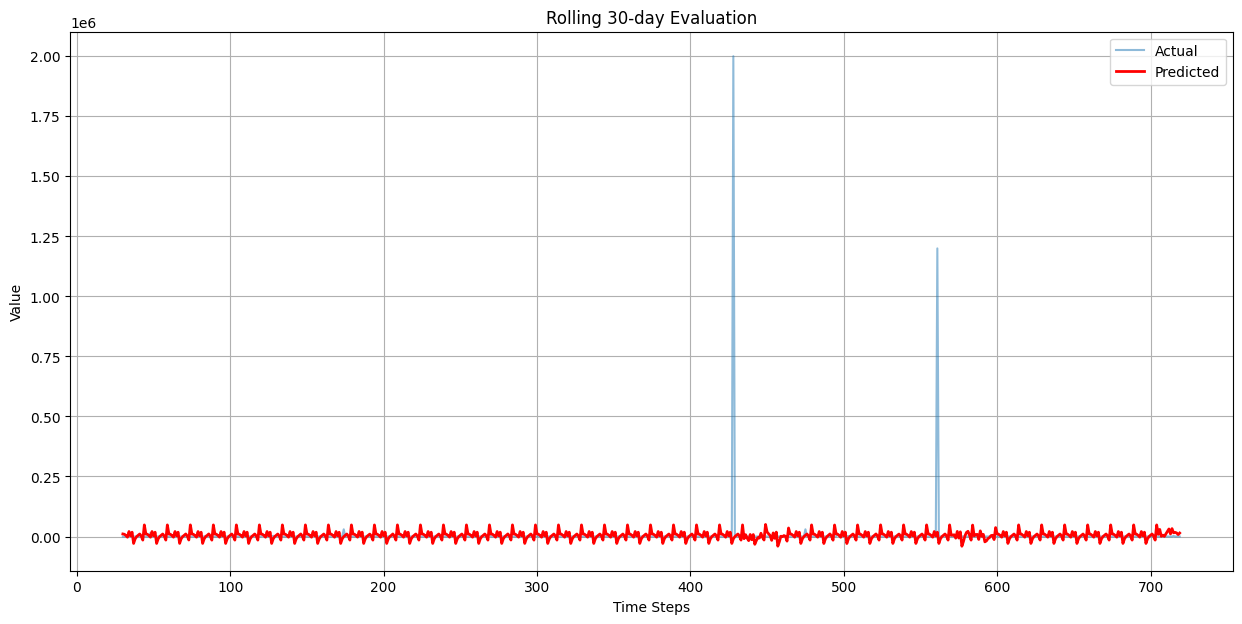

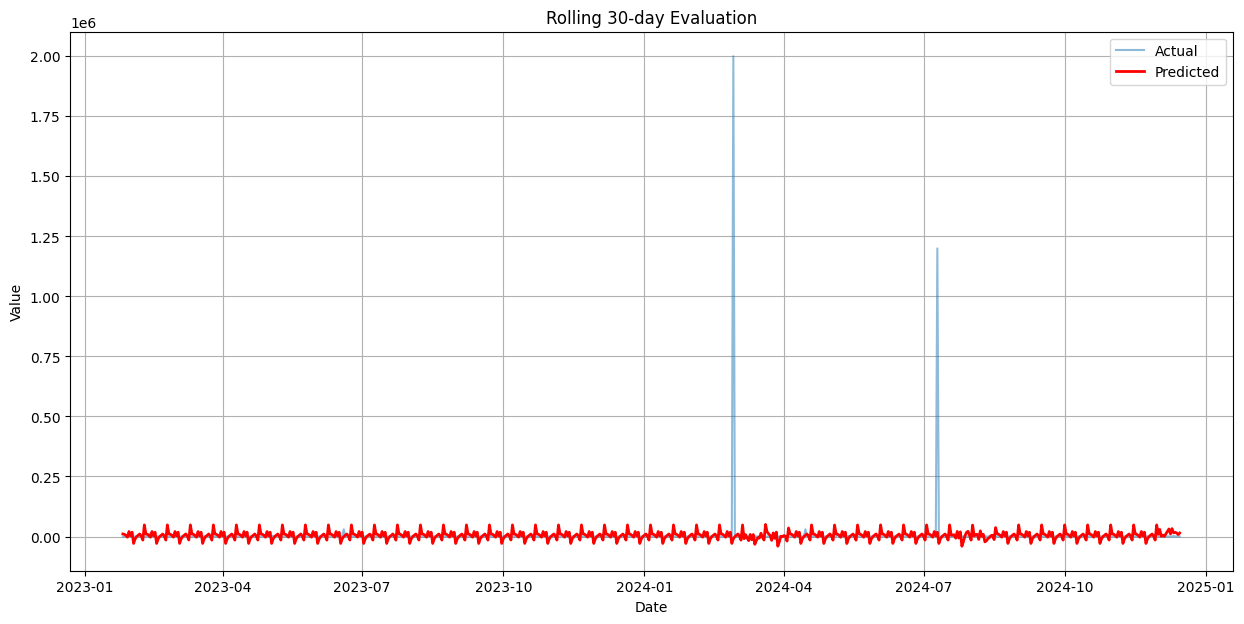

In [21]:
# Perform rolling 30-day evaluation
def rolling_evaluation(data, input_window, output_window, step=15):
    """
    Perform rolling evaluation on the time series

    Args:
        data: Full time series data
        input_window: Input window size
        output_window: Output window size
        step: Step size for rolling

    Returns:
        DataFrame with actual and predicted values
    """
    results = []

    for i in range(input_window, len(data) - output_window + 1, step):
        # Get input window
        x = data[i - input_window:i]

        # Get actual values
        actual = data[i:i+output_window]

        # Make prediction
        pred = predict(model, x)

        # Store results
        for j in range(min(output_window, len(actual))):
            idx = i + j
            if idx < len(data):
                results.append({
                    'Index': idx,
                    'Actual': data[idx],
                    'Predicted': pred[j]
                })

    return pd.DataFrame(results)

# Perform rolling evaluation
rolling_results = rolling_evaluation(
    data,
    input_window=input_window,
    output_window=output_window,
    step=15
)

# Remove duplicates and keep the last prediction for each index
rolling_results = rolling_results.drop_duplicates(subset=['Index'], keep='last')

# Sort by index
rolling_results = rolling_results.sort_values('Index')

# Inverse transform the values
rolling_results['Actual_Original'] = scaler.inverse_transform(
    rolling_results['Actual'].values.reshape(-1, 1)).flatten()
rolling_results['Predicted_Original'] = scaler.inverse_transform(
    rolling_results['Predicted'].values.reshape(-1, 1)).flatten()

# Calculate metrics
metrics_rolling = evaluate_model(
    rolling_results['Actual_Original'].values,
    rolling_results['Predicted_Original'].values
)

print("\nRolling Evaluation Metrics:")
for metric, value in metrics_rolling.items():
    print(f"{metric}: {value:.4f}")

# Plot rolling evaluation results
plt.figure(figsize=(15, 7))
plt.plot(rolling_results['Index'], rolling_results['Actual_Original'],
         label='Actual', alpha=0.5)
plt.plot(rolling_results['Index'], rolling_results['Predicted_Original'],
         label='Predicted', color='red', linewidth=2)
plt.title('Rolling 30-day Evaluation')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# Map indices to dates
index_to_date = {i: date for i, date in enumerate(time_series_df['Date'])}
rolling_results['Date'] = rolling_results['Index'].map(index_to_date)

# Plot with dates
plt.figure(figsize=(15, 7))
plt.plot(rolling_results['Date'], rolling_results['Actual_Original'],
         label='Actual', alpha=0.5)
plt.plot(rolling_results['Date'], rolling_results['Predicted_Original'],
         label='Predicted', color='red', linewidth=2)
plt.title('Rolling 30-day Evaluation')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
# Enhanced Evaluation and Visualization

def enhanced_evaluation(model, time_series_df, data, scaler, input_window, output_window):
    """
    Perform detailed evaluation of the model with multiple visualizations

    Args:
        model: Trained N-BEATS model
        time_series_df: Original DataFrame with dates
        data: Scaled data
        scaler: MinMaxScaler used for scaling
        input_window: Input window size
        output_window: Output window size
    """
    # Split into train and test sets (80% train, 20% test)
    split_idx = int(len(data) * 0.8)
    train_data = data[:split_idx]
    test_data = data[split_idx:]

    print(f"Training data points: {len(train_data)}")
    print(f"Testing data points: {len(test_data)}")

    # Get the corresponding dates
    train_dates = time_series_df['Date'][:split_idx]
    test_dates = time_series_df['Date'][split_idx:]

    # 1. Direct Evaluation on Test Set
    print("\n1. Direct Evaluation on Test Set")
    print("=" * 50)

    test_predictions = []
    test_actuals = []
    prediction_dates = []

    for i in range(0, len(test_data) - output_window + 1, output_window):
        # Get the input window from combined data
        input_idx = split_idx + i - input_window
        x = data[input_idx:split_idx + i]

        # Skip if not enough data for input window
        if len(x) < input_window:
            continue

        # Get actual values
        actual = test_data[i:i+output_window]

        # Make prediction
        pred = predict(model, x)

        # Get dates for this prediction window
        pred_dates = test_dates[i:i+output_window]

        # Store
        test_predictions.append(pred)
        test_actuals.append(actual)
        prediction_dates.extend(pred_dates)

    # Convert lists to arrays
    test_predictions = np.concatenate(test_predictions)
    test_actuals = np.concatenate(test_actuals)

    # Ensure same lengths
    min_len = min(len(test_predictions), len(test_actuals), len(prediction_dates))
    test_predictions = test_predictions[:min_len]
    test_actuals = test_actuals[:min_len]
    prediction_dates = prediction_dates[:min_len]

    # Inverse scale
    test_predictions_orig = scaler.inverse_transform(test_predictions.reshape(-1, 1)).flatten()
    test_actuals_orig = scaler.inverse_transform(test_actuals.reshape(-1, 1)).flatten()

    # Calculate metrics
    metrics = evaluate_model(test_actuals_orig, test_predictions_orig)

    print("Test Set Evaluation Metrics:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")

    # Create DataFrame for test results
    test_results_df = pd.DataFrame({
        'Date': prediction_dates,
        'Actual': test_actuals_orig,
        'Predicted': test_predictions_orig,
        'Error': test_actuals_orig - test_predictions_orig,
        'Absolute_Error': np.abs(test_actuals_orig - test_predictions_orig),
        'Percentage_Error': np.abs((test_actuals_orig - test_predictions_orig) / test_actuals_orig) * 100
    })

    # Display sample of results
    print("\nSample of Test Results:")
    print(test_results_df.head(10))

    # 1.1 Plot Actual vs Predicted (Simple line plot)
    plt.figure(figsize=(16, 8))
    plt.plot(test_results_df['Date'], test_results_df['Actual'], 'b-', label='Actual')
    plt.plot(test_results_df['Date'], test_results_df['Predicted'], 'r-', label='Predicted')
    plt.title('Test Set: Actual vs Predicted Values', fontsize=15)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Value', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # 1.2 Plot Actual vs Predicted (Scatter plot)
    plt.figure(figsize=(10, 8))
    plt.scatter(test_results_df['Actual'], test_results_df['Predicted'], alpha=0.5)

    # Add perfect prediction line
    min_val = min(test_results_df['Actual'].min(), test_results_df['Predicted'].min())
    max_val = max(test_results_df['Actual'].max(), test_results_df['Predicted'].max())
    plt.plot([min_val, max_val], [min_val, max_val], 'r--')

    plt.title('Actual vs Predicted Values (Scatter Plot)', fontsize=15)
    plt.xlabel('Actual Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # 1.3 Plot Error Distribution
    plt.figure(figsize=(12, 6))
    plt.hist(test_results_df['Error'], bins=30, alpha=0.7, color='blue')
    plt.axvline(x=0, color='r', linestyle='--')
    plt.title('Error Distribution', fontsize=15)
    plt.xlabel('Error (Actual - Predicted)', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # 1.4 Plot Error Over Time
    plt.figure(figsize=(16, 8))
    plt.plot(test_results_df['Date'], test_results_df['Error'], 'b-')
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title('Error Over Time', fontsize=15)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Error (Actual - Predicted)', fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # 2. Rolling 30-Day Evaluation
    print("\n2. Rolling 30-Day Evaluation")
    print("=" * 50)

    # Perform rolling window evaluation
    rolling_results = []

    for i in range(input_window, len(data) - output_window + 1, 15):  # Step size of 15
        # Get input window
        x = data[i - input_window:i]

        # Get actual values
        actual = data[i:i + output_window]

        # Get dates
        actual_dates = time_series_df['Date'][i:i + output_window]

        # Make prediction
        pred = predict(model, x)

        # Store results for this window
        for j in range(min(output_window, len(actual))):
            idx = i + j
            if idx < len(data):
                rolling_results.append({
                    'Index': idx,
                    'Date': time_series_df['Date'].iloc[idx],
                    'Actual': data[idx],
                    'Predicted': pred[j]
                })

    # Convert to DataFrame
    rolling_df = pd.DataFrame(rolling_results)

    # Remove duplicates (keep last prediction for each date)
    rolling_df = rolling_df.drop_duplicates(subset=['Date'], keep='last')

    # Sort by date
    rolling_df = rolling_df.sort_values('Date')

    # Inverse transform
    rolling_df['Actual_Original'] = scaler.inverse_transform(
        rolling_df['Actual'].values.reshape(-1, 1)).flatten()
    rolling_df['Predicted_Original'] = scaler.inverse_transform(
        rolling_df['Predicted'].values.reshape(-1, 1)).flatten()

    # Calculate metrics
    rolling_metrics = evaluate_model(
        rolling_df['Actual_Original'].values,
        rolling_df['Predicted_Original'].values
    )

    print("Rolling Evaluation Metrics:")
    for metric, value in rolling_metrics.items():
        print(f"{metric}: {value:.4f}")

    # Calculate additional columns
    rolling_df['Error'] = rolling_df['Actual_Original'] - rolling_df['Predicted_Original']
    rolling_df['Absolute_Error'] = np.abs(rolling_df['Error'])
    rolling_df['Percentage_Error'] = (rolling_df['Absolute_Error'] / rolling_df['Actual_Original']) * 100

    # Display sample of results
    print("\nSample of Rolling Evaluation Results:")
    print(rolling_df[['Date', 'Actual_Original', 'Predicted_Original', 'Error', 'Percentage_Error']].head(10))

    # 2.1 Plot Rolling Evaluation Results
    plt.figure(figsize=(16, 8))
    plt.plot(rolling_df['Date'], rolling_df['Actual_Original'], 'b-', label='Actual', alpha=0.7)
    plt.plot(rolling_df['Date'], rolling_df['Predicted_Original'], 'r-', label='Predicted')
    plt.title('Rolling 30-Day Evaluation: Actual vs Predicted', fontsize=15)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Value', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # 2.2 Plot Rolling Evaluation Errors
    plt.figure(figsize=(16, 8))
    plt.plot(rolling_df['Date'], rolling_df['Error'], 'b-')
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title('Rolling Evaluation: Error Over Time', fontsize=15)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Error (Actual - Predicted)', fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # 2.3 Plot Percentage Error
    plt.figure(figsize=(16, 8))
    plt.plot(rolling_df['Date'], rolling_df['Percentage_Error'], 'b-')
    plt.axhline(y=10, color='r', linestyle='--', label='10% Error')
    plt.title('Rolling Evaluation: Percentage Error Over Time', fontsize=15)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Percentage Error (%)', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # 2.4 Create a heatmap of forecast accuracy by day
    if len(rolling_df) > 30:
        # Extract day of week
        rolling_df['Day_of_Week'] = rolling_df['Date'].dt.day_name()

        # Group by day of week and calculate average error
        dow_error = rolling_df.groupby('Day_of_Week')['Percentage_Error'].mean().reindex([
            'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
        ])

        plt.figure(figsize=(12, 6))
        sns.barplot(x=dow_error.index, y=dow_error.values)
        plt.title('Average Percentage Error by Day of Week', fontsize=15)
        plt.xlabel('Day of Week', fontsize=12)
        plt.ylabel('Average Percentage Error (%)', fontsize=12)
        plt.grid(True, axis='y')
        plt.tight_layout()
        plt.show()

    # 3. Future Forecast
    print("\n3. Future 30-Day Forecast")
    print("=" * 50)

    # Get last input window
    last_window = data[-input_window:]

    # Generate forecast
    forecast = rolling_forecast(model, data, input_window, output_window)

    # Inverse transform
    forecast_orig = scaler.inverse_transform(forecast.reshape(-1, 1)).flatten()

    # Create dates for forecast
    last_date = time_series_df['Date'].iloc[-1]
    forecast_dates = [last_date + datetime.timedelta(days=i+1) for i in range(len(forecast))]

    # Create DataFrame
    forecast_df = pd.DataFrame({
        'Date': forecast_dates,
        'Forecast': forecast_orig
    })

    print("30-Day Forecast:")
    print(forecast_df)

    # Plot historical data and forecast
    plt.figure(figsize=(16, 8))

    # Historical data
    plt.plot(time_series_df['Date'], time_series_df['Payments'], 'b-', label='Historical Data')

    # Forecast
    plt.plot(forecast_df['Date'], forecast_df['Forecast'], 'r-', label='30-Day Forecast', linewidth=2)

    # Add vertical line at the forecast start
    plt.axvline(x=last_date, color='k', linestyle='--')

    plt.title('30-Day Future Forecast', fontsize=15)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Value', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # 4. Residual Analysis
    print("\n4. Residual Analysis")
    print("=" * 50)

    # Combine test and rolling results for comprehensive analysis
    all_residuals = pd.concat([
        test_results_df[['Date', 'Actual', 'Predicted', 'Error']],
        rolling_df[['Date', 'Actual_Original', 'Predicted_Original', 'Error']].rename(
            columns={'Actual_Original': 'Actual', 'Predicted_Original': 'Predicted'})
    ])

    # 4.1 ACF of residuals
    from statsmodels.graphics.tsaplots import plot_acf

    plt.figure(figsize=(12, 6))
    plot_acf(all_residuals['Error'].dropna(), lags=30)
    plt.title('Autocorrelation of Residuals', fontsize=15)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # 4.2 Q-Q plot of residuals
    from scipy import stats

    plt.figure(figsize=(10, 10))
    stats.probplot(all_residuals['Error'].dropna(), dist="norm", plot=plt)
    plt.title('Q-Q Plot of Residuals', fontsize=15)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Return results for further analysis if needed
    return {
        'test_results': test_results_df,
        'rolling_results': rolling_df,
        'forecast': forecast_df
    }

In [23]:
# Multi-horizon visualization
def visualize_multi_horizon_predictions(model, time_series_df, data, scaler, input_window, output_window):
    """
    Visualize predictions at multiple horizons with color gradient

    Args:
        model: Trained N-BEATS model
        time_series_df: Original DataFrame with dates
        data: Scaled data
        scaler: MinMaxScaler used for scaling
        input_window: Input window size
        output_window: Output window size
    """
    # Define horizons to visualize
    horizons = [1, 7, 14, 30]  # 1-day, 7-day, 14-day, and 30-day horizons

    # Create predictions for each horizon
    horizon_predictions = {}

    # Use only a portion of data for visualization clarity
    start_idx = len(data) - 180  # Last 180 data points
    if start_idx < 0:
        start_idx = 0

    visualization_data = data[start_idx:]
    visualization_dates = time_series_df['Date'][start_idx:]

    for horizon in horizons:
        predictions = []
        dates = []

        for i in range(input_window, len(visualization_data) - horizon + 1):
            # Get input window
            x = visualization_data[i - input_window:i]

            # Make prediction for specific horizon
            pred = predict(model, x)

            # Store only the prediction at the specified horizon
            predictions.append(pred[horizon - 1])
            dates.append(visualization_dates.iloc[i + horizon - 1])

        # Inverse transform
        predictions_orig = scaler.inverse_transform(
            np.array(predictions).reshape(-1, 1)).flatten()

        # Store
        horizon_predictions[horizon] = {
            'dates': dates,
            'predictions': predictions_orig
        }

    # Get actual values
    actual_values = scaler.inverse_transform(
        visualization_data.reshape(-1, 1)).flatten()

    # Create visualization
    plt.figure(figsize=(16, 10))

    # Plot actual values
    plt.plot(visualization_dates, actual_values, 'k-',
             label='Actual Values', linewidth=2)

    # Plot predictions with color gradient
    colors = plt.cm.plasma(np.linspace(0, 1, len(horizons)))

    for i, horizon in enumerate(horizons):
        plt.plot(horizon_predictions[horizon]['dates'],
                 horizon_predictions[horizon]['predictions'],
                 color=colors[i], linestyle='-', marker='.', markersize=3,
                 label=f'{horizon}-Day Horizon', alpha=0.7)

    plt.title('Predictions at Multiple Horizons', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Value', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Create a more detailed visualization for the last 60 days
    last_60_idx = max(len(visualization_dates) - 60, 0)

    plt.figure(figsize=(16, 10))

    # Plot actual values
    plt.plot(visualization_dates[last_60_idx:],
             actual_values[last_60_idx:],
             'k-', label='Actual Values', linewidth=2)

    # Plot predictions
    for i, horizon in enumerate(horizons):
        # Filter to match the date range
        horizon_dates = horizon_predictions[horizon]['dates']
        horizon_preds = horizon_predictions[horizon]['predictions']

        # Find indices that fall within our date range
        valid_indices = [j for j, date in enumerate(horizon_dates)
                        if date >= visualization_dates.iloc[last_60_idx]]

        if valid_indices:
            filtered_dates = [horizon_dates[j] for j in valid_indices]
            filtered_preds = [horizon_preds[j] for j in valid_indices]

            plt.plot(filtered_dates, filtered_preds,
                     color=colors[i], linestyle='-', marker='.', markersize=5,
                     label=f'{horizon}-Day Horizon', alpha=0.7)

    plt.title('Predictions at Multiple Horizons (Last 60 Days)', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Value', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [24]:
def create_evaluation_report(model, time_series_df, data, scaler, input_window, output_window):
    """
    Create a comprehensive evaluation report for the N-BEATS model
    """
    # Make sure seaborn is imported for better visualizations
    import seaborn as sns
    sns.set_style('whitegrid')

    print("=" * 80)
    print("COMPREHENSIVE N-BEATS MODEL EVALUATION REPORT")
    print("=" * 80)

    # Basic model information
    print("\nModel Configuration:")
    print(f"Input Window Size: {input_window} days")
    print(f"Output Window Size (Forecast Horizon): {output_window} days")
    print(f"Total Data Points: {len(data)}")

    # Run enhanced evaluation
    results = enhanced_evaluation(model, time_series_df, data, scaler, input_window, output_window)

    # Run multi-horizon visualization
    visualize_multi_horizon_predictions(model, time_series_df, data, scaler, input_window, output_window)

    # Calculate average metrics across all evaluations
    test_metrics = evaluate_model(
        results['test_results']['Actual'].values,
        results['test_results']['Predicted'].values
    )

    rolling_metrics = evaluate_model(
        results['rolling_results']['Actual_Original'].values,
        results['rolling_results']['Predicted_Original'].values
    )

    # Average metrics
    avg_mape = (test_metrics['MAPE'] + rolling_metrics['MAPE']) / 2
    avg_rmse = (test_metrics['RMSE'] + rolling_metrics['RMSE']) / 2
    avg_mae = (test_metrics['MAE'] + rolling_metrics['MAE']) / 2

    print("\n" + "=" * 80)
    print("SUMMARY STATISTICS")
    print("=" * 80)
    print(f"Average MAPE: {avg_mape:.2f}%")
    print(f"Average RMSE: {avg_rmse:.2f}")
    print(f"Average MAE: {avg_mae:.2f}")

    # Interpretation of results
    print("\nInterpretation:")
    if avg_mape < 10:
        print("• The model has excellent predictive performance (MAPE < 10%).")
    elif avg_mape < 20:
        print("• The model has good predictive performance (MAPE < 20%).")
    elif avg_mape < 30:
        print("• The model has fair predictive performance (MAPE < 30%).")
    else:
        print("• The model has poor predictive performance (MAPE > 30%).")
        print("  Consider:")
        print("  - Using a longer input window")
        print("  - Adding more training data")
        print("  - Adjusting model hyperparameters")

    # Return the results for further analysis if needed
    return results

COMPREHENSIVE N-BEATS MODEL EVALUATION REPORT

Model Configuration:
Input Window Size: 30 days
Output Window Size (Forecast Horizon): 30 days
Total Data Points: 722
Training data points: 577
Testing data points: 145

1. Direct Evaluation on Test Set
Test Set Evaluation Metrics:
MSE: 300458878.8178
RMSE: 17333.7497
MAE: 13407.8582
MAPE: inf

Sample of Test Results:
        Date  Actual     Predicted         Error  Absolute_Error  \
0 2024-07-26     0.0   4576.008789  -4576.008789     4576.008789   
1 2024-07-27     0.0   1787.598877  -1787.598877     1787.598877   
2 2024-07-28     0.0   5842.398926  -5842.398926     5842.398926   
3 2024-07-29     0.0   4055.053223  -4055.053223     4055.053223   
4 2024-07-30    30.0  29023.472656 -28993.472656    28993.472656   
5 2024-07-31    30.0   5523.981934  -5493.981934     5493.981934   
6 2024-08-01     0.0   8402.615234  -8402.615234     8402.615234   
7 2024-08-02     0.0 -31429.427734  31429.427734    31429.427734   
8 2024-08-03     0.0 

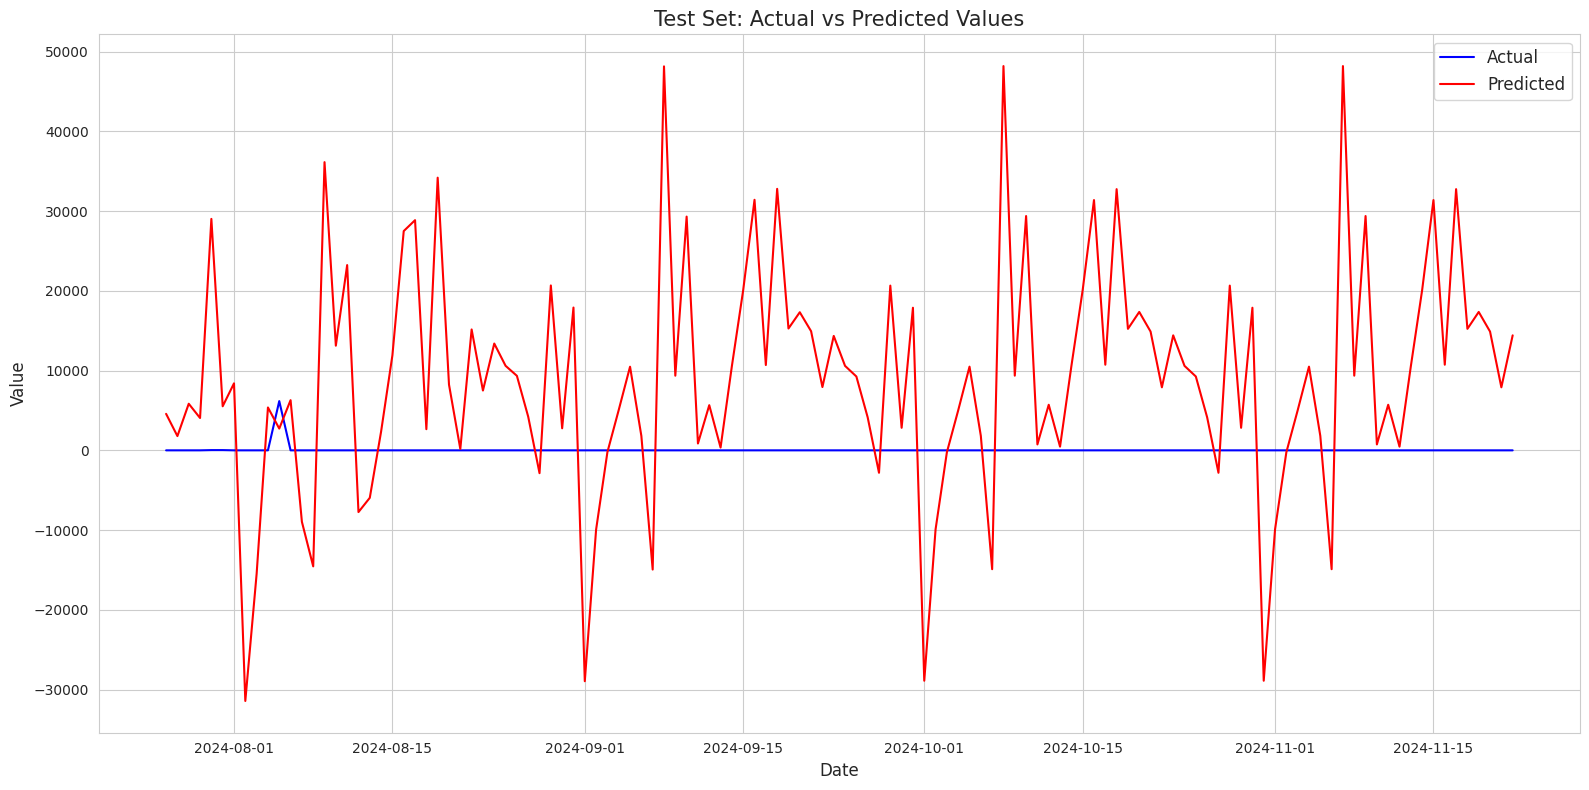

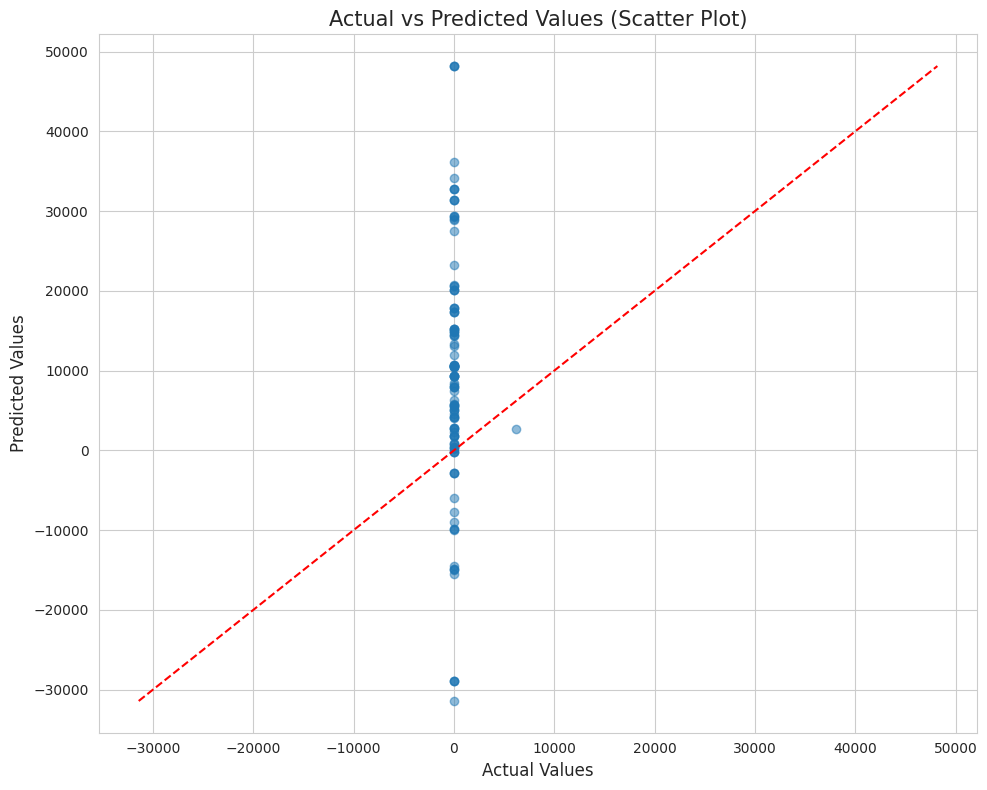

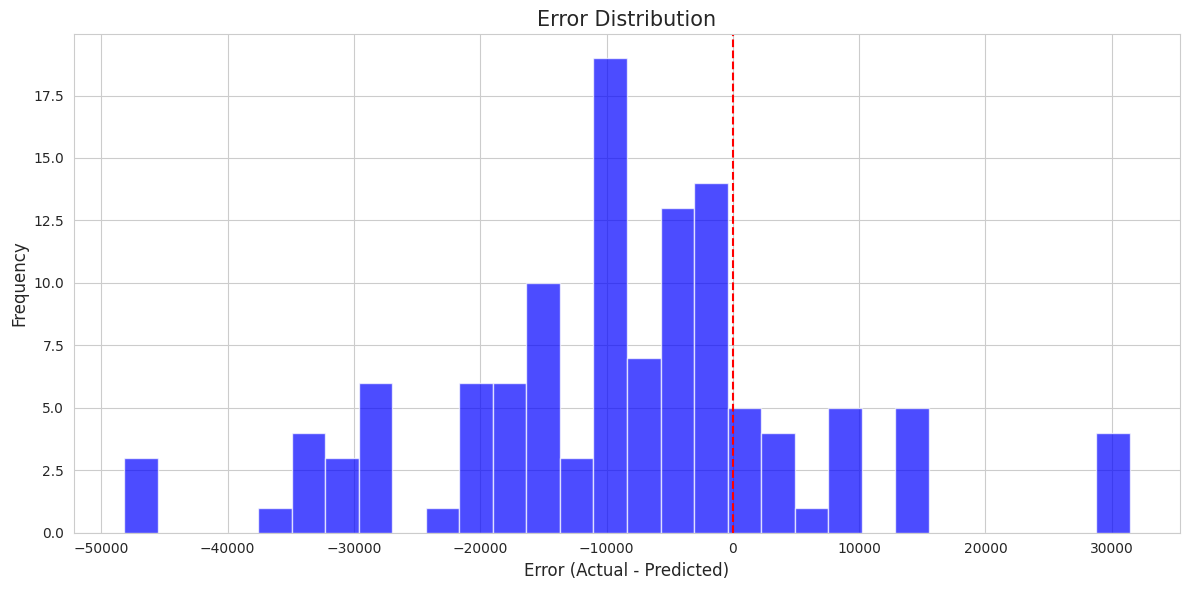

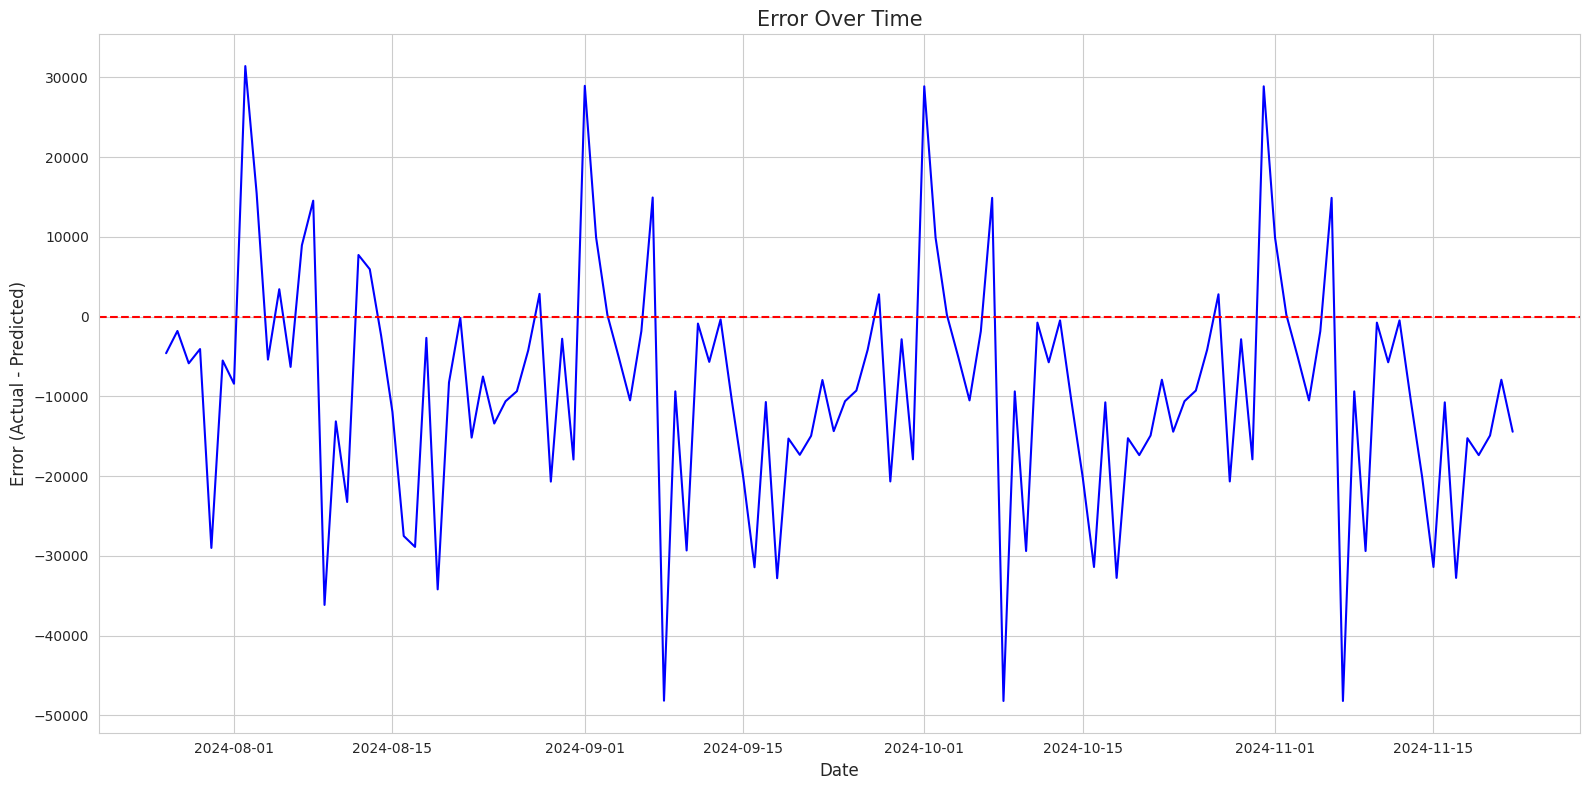


2. Rolling 30-Day Evaluation
Rolling Evaluation Metrics:
MSE: 8191589466.8938
RMSE: 90507.4001
MAE: 17327.7821
MAPE: inf

Sample of Rolling Evaluation Results:
        Date  Actual_Original  Predicted_Original         Error  \
0 2023-01-26              0.0        10593.408203 -10593.408203   
1 2023-01-27              0.0         9264.534180  -9264.534180   
2 2023-01-28              0.0         4137.700684  -4137.700684   
3 2023-01-29              0.0        -2812.000488   2812.000488   
4 2023-01-30           2450.0        20656.369141 -18206.369141   
5 2023-01-31              0.0         2826.391357  -2826.391357   
6 2023-02-01              0.0        17882.539062 -17882.539062   
7 2023-02-02              0.0       -28892.085938  28892.085938   
8 2023-02-03              0.0        -9912.495117   9912.495117   
9 2023-02-04              0.0         -241.503876    241.503876   

   Percentage_Error  
0               inf  
1               inf  
2               inf  
3            

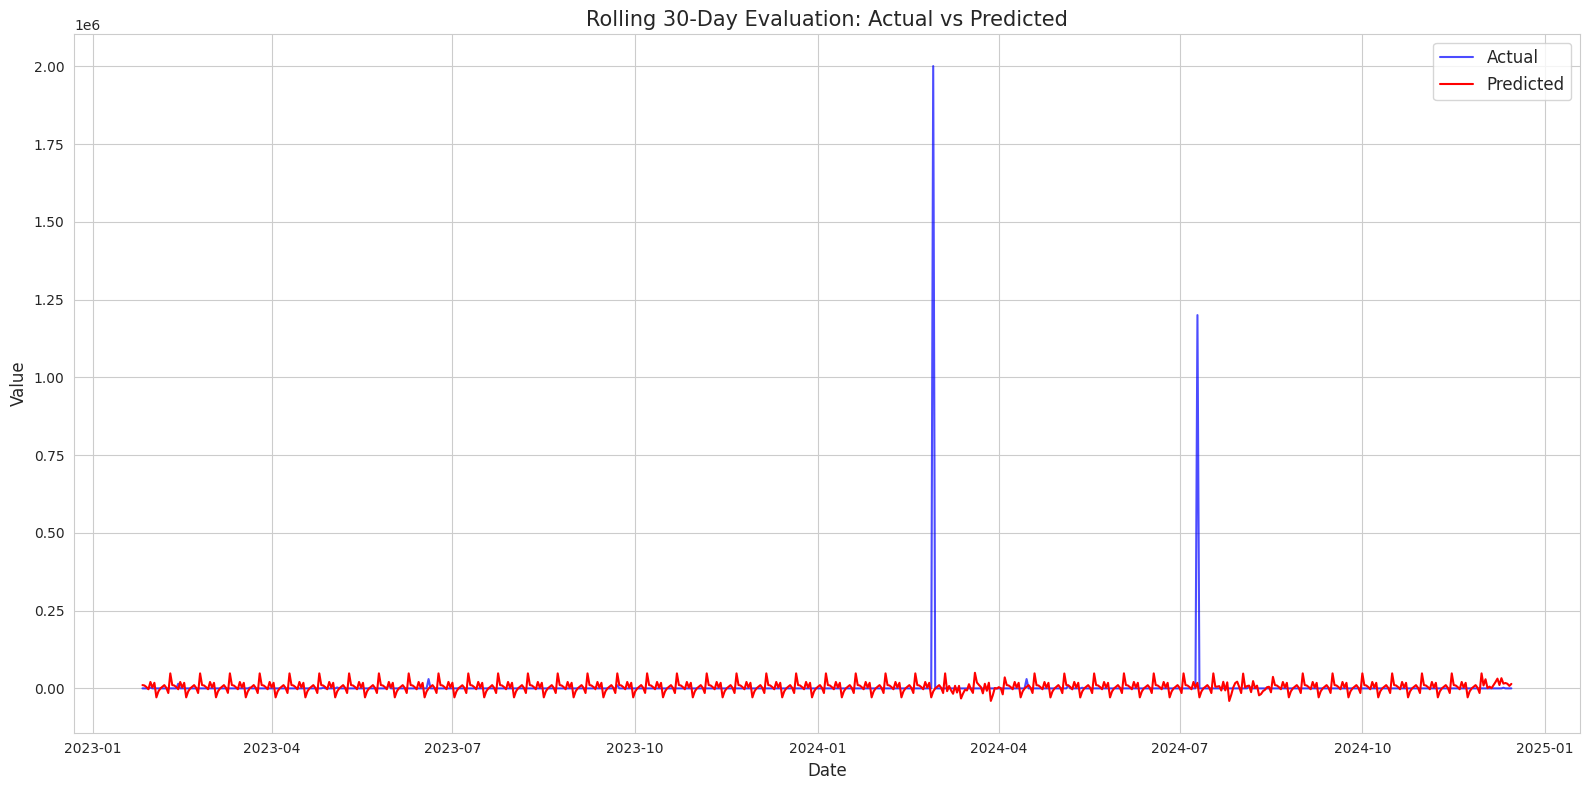

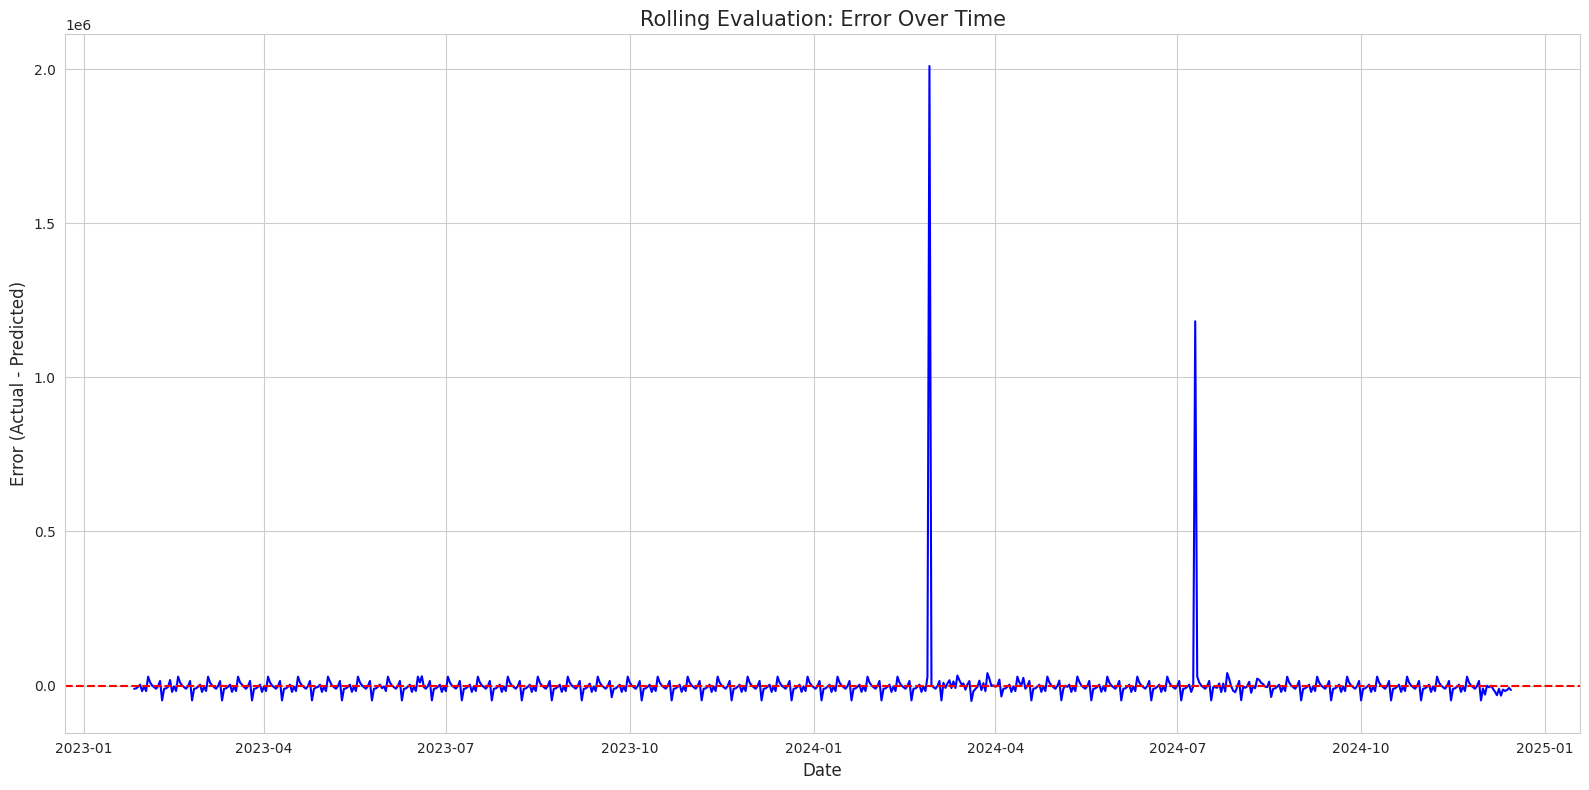

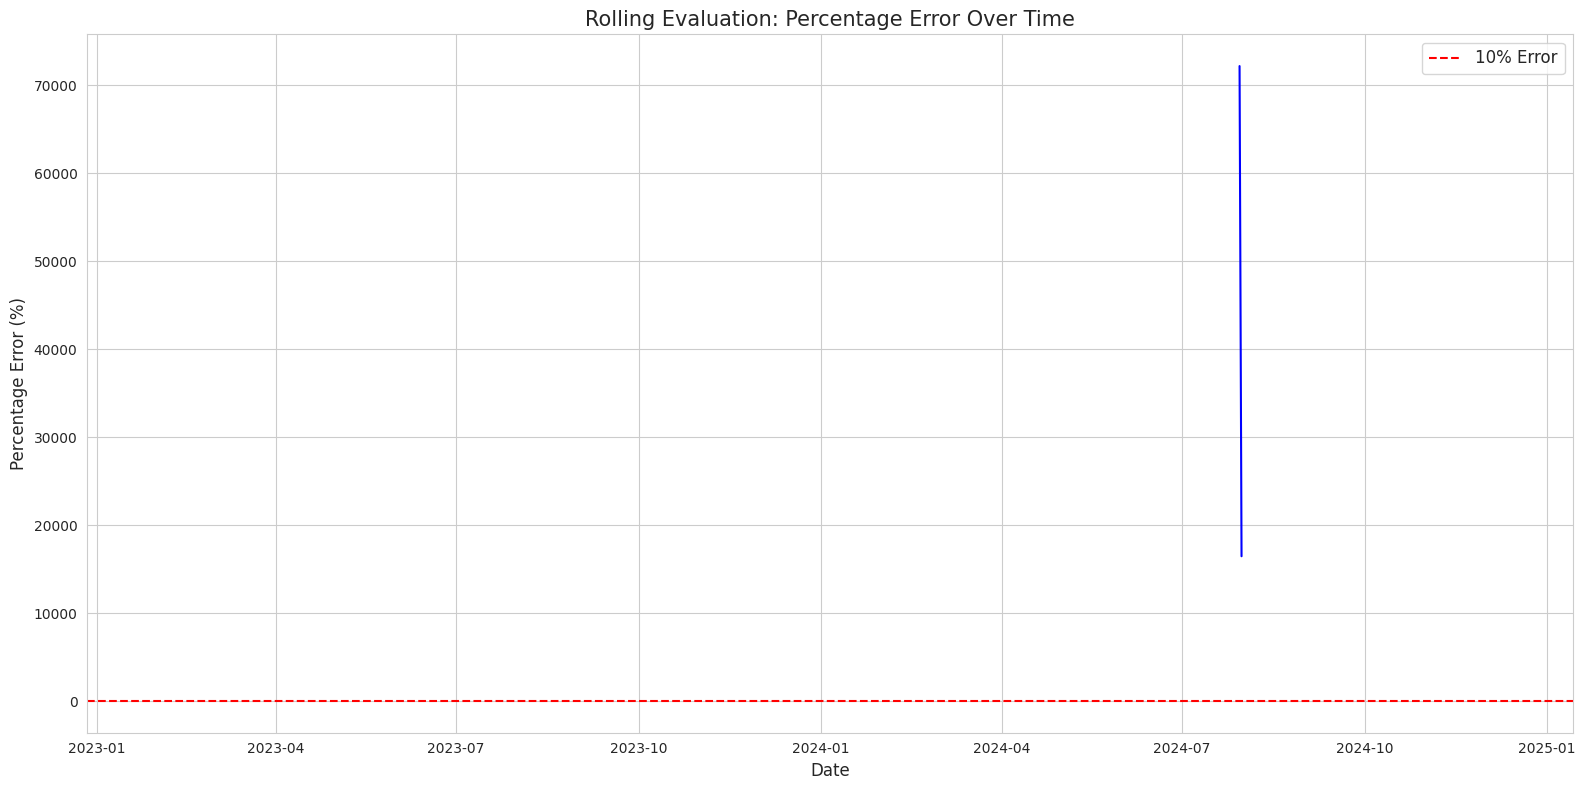

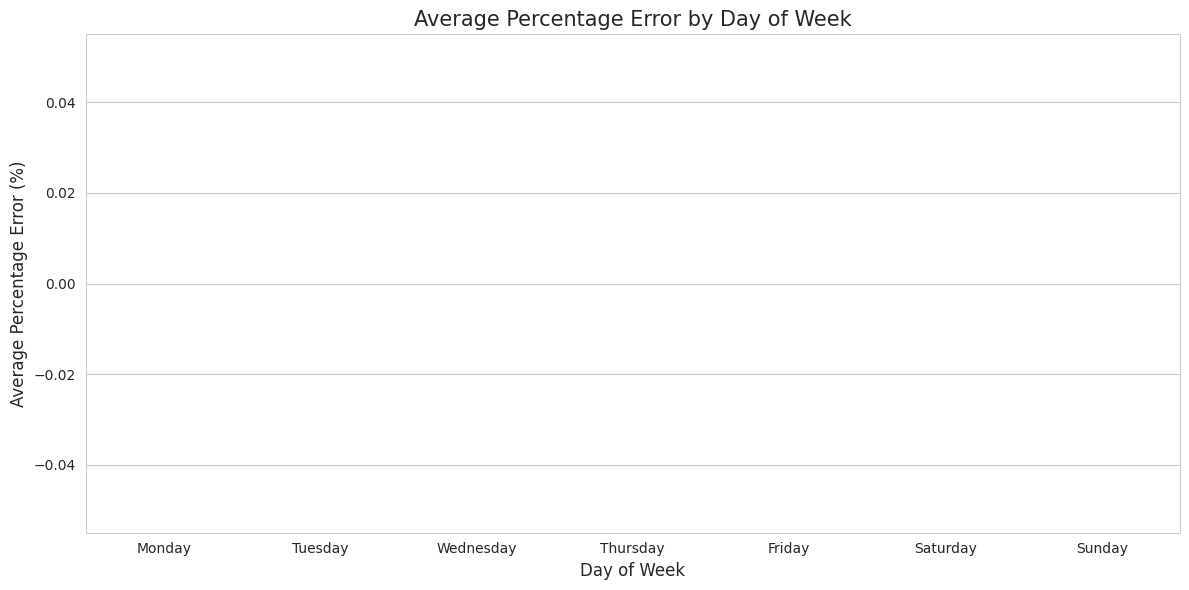


3. Future 30-Day Forecast
30-Day Forecast:
         Date      Forecast
0  2024-12-18  10415.812500
1  2024-12-19  10317.283203
2  2024-12-20  10330.000977
3  2024-12-21  10332.311523
4  2024-12-22  10292.705078
5  2024-12-23  10206.584961
6  2024-12-24  10180.691406
7  2024-12-25  10095.603516
8  2024-12-26  10073.755859
9  2024-12-27  10026.146484
10 2024-12-28  10027.334961
11 2024-12-29  10064.842773
12 2024-12-30  10078.913086
13 2024-12-31  10126.109375
14 2025-01-01  10115.408203
15 2025-01-02  10136.926758
16 2025-01-03  10079.573242
17 2025-01-04  10065.718750
18 2025-01-05  10096.732422
19 2025-01-06  10120.904297
20 2025-01-07  10161.217773
21 2025-01-08  10163.375977
22 2025-01-09  10087.967773
23 2025-01-10   9998.508789
24 2025-01-11   9948.153320
25 2025-01-12   9973.871094
26 2025-01-13  10020.523438
27 2025-01-14  10059.916992
28 2025-01-15  10110.038086
29 2025-01-16  10134.009766


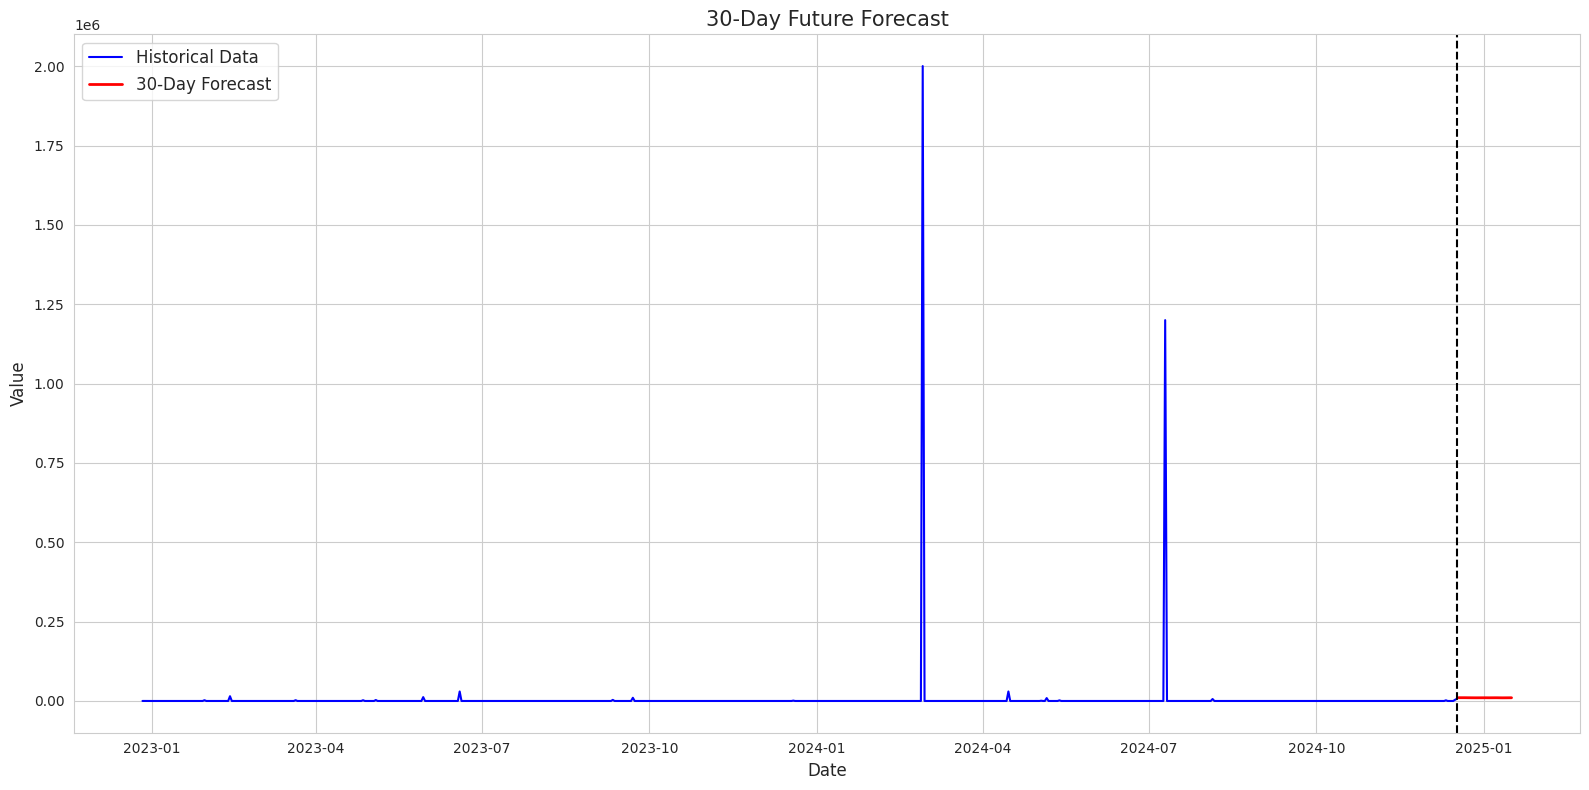


4. Residual Analysis


<Figure size 1200x600 with 0 Axes>

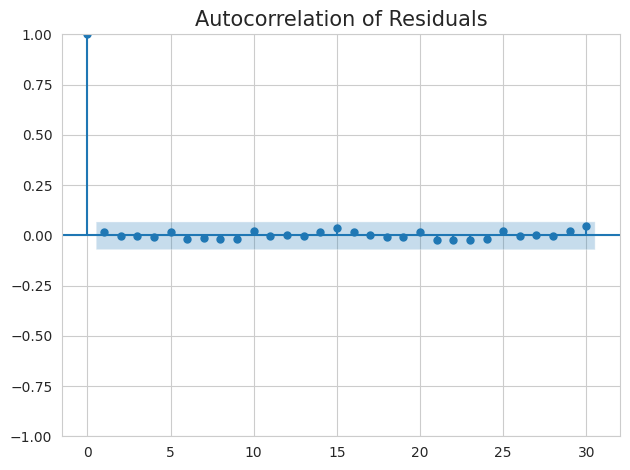

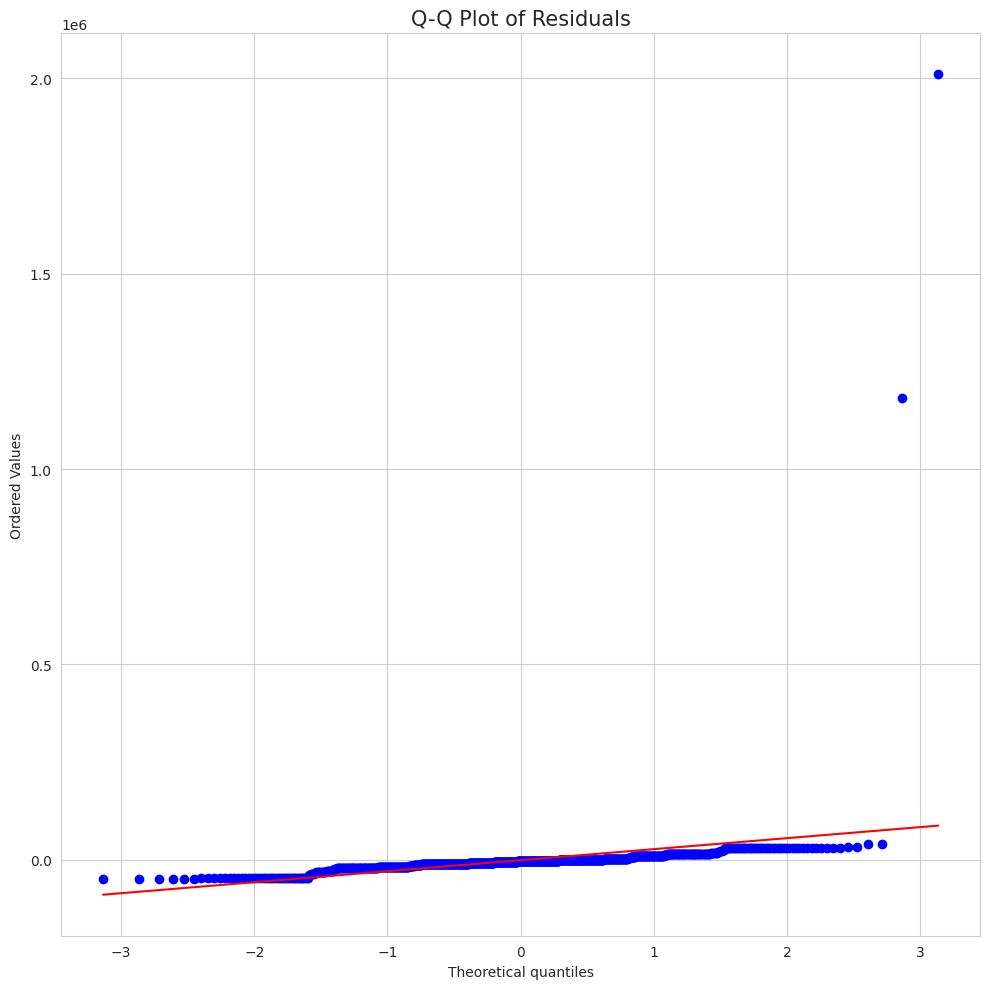

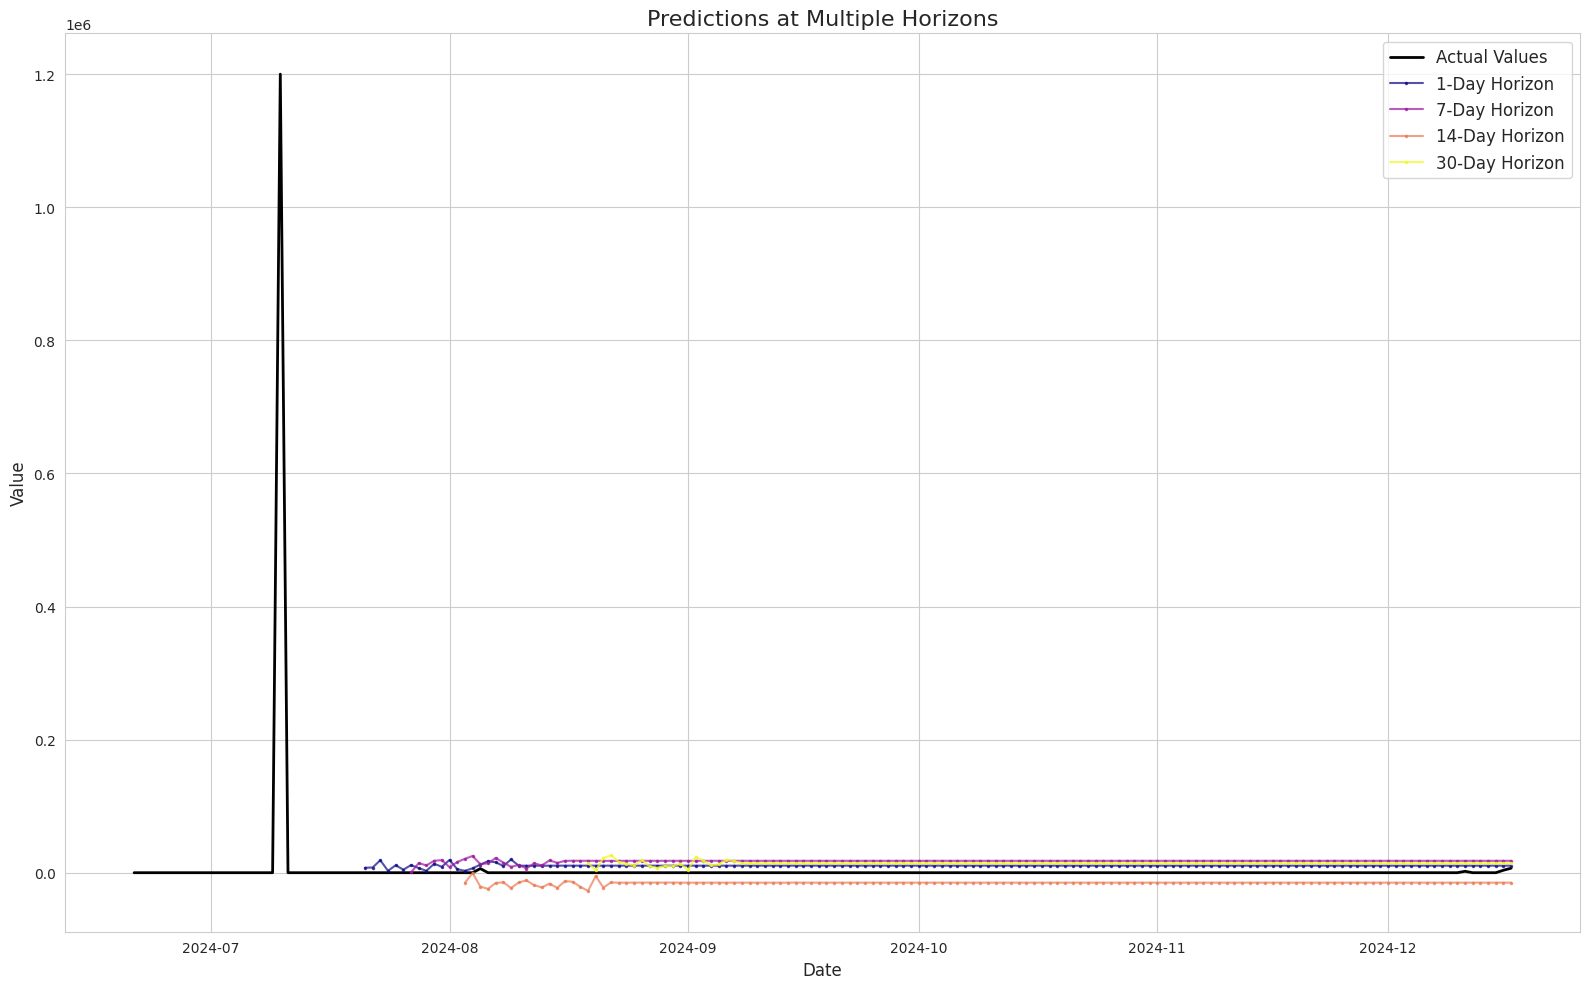

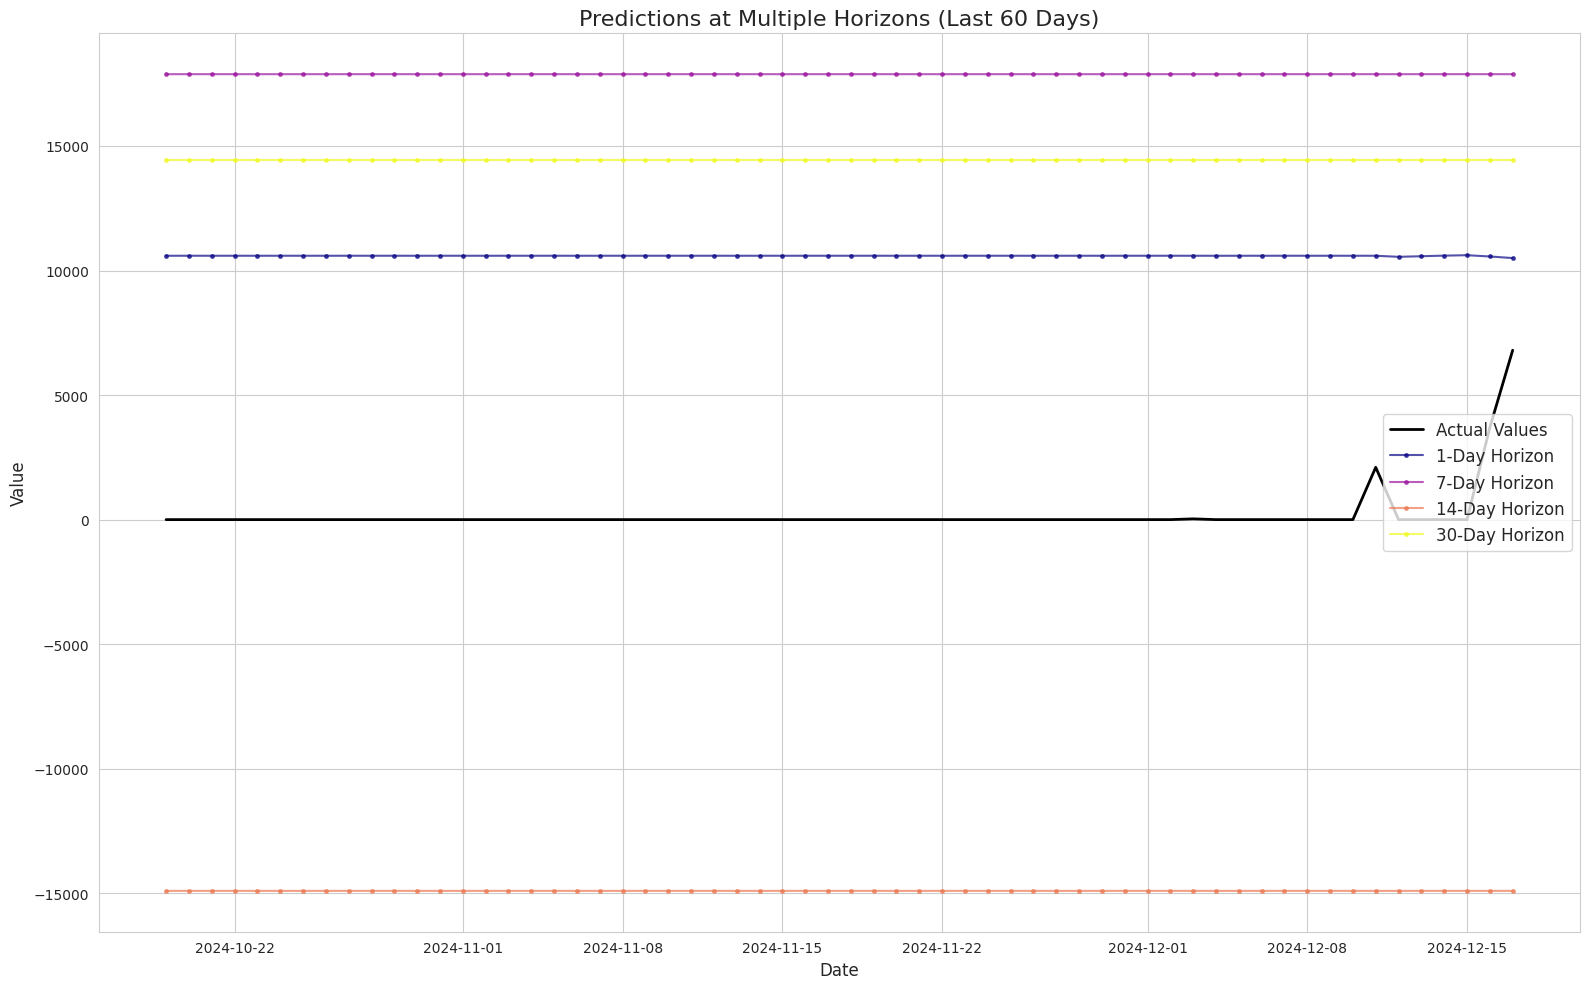


SUMMARY STATISTICS
Average MAPE: inf%
Average RMSE: 53920.57
Average MAE: 15367.82

Interpretation:
• The model has poor predictive performance (MAPE > 30%).
  Consider:
  - Using a longer input window
  - Adding more training data
  - Adjusting model hyperparameters


In [25]:
# Import additional libraries for evaluation
try:
    import seaborn as sns
    from statsmodels.graphics.tsaplots import plot_acf
    from scipy import stats
except ImportError:
    !pip install seaborn statsmodels scipy
    import seaborn as sns
    from statsmodels.graphics.tsaplots import plot_acf
    from scipy import stats

# Run the comprehensive evaluation
evaluation_results = create_evaluation_report(model, time_series_df, data, scaler, input_window, output_window)